In [1]:
import pyspark

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1625852704433_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
df = spark.read.parquet("s3://bigdata-desafio/transantiago").persist()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- fechahoratrx: timestamp (nullable = true)
 |-- codigoentidad: long (nullable = true)
 |-- nombreentidad: string (nullable = true)
 |-- codigositio: long (nullable = true)
 |-- nombresitio: string (nullable = true)
 |-- nrotarjeta: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- from: integer (nullable = true)
 |-- to: integer (nullable = true)

## Ej 1.

### Punto 1.

In [4]:
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

456532128

In [5]:
from pyspark.sql.functions import to_date, col, hour

df2 = df.withColumn('datetrx', to_date(col("fechahoratrx"))
                   ).withColumn('hourtrx', hour(col("fechahoratrx")))

df2.select("fechahoratrx", "datetrx", "hourtrx").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------+-------+
|       fechahoratrx|   datetrx|hourtrx|
+-------------------+----------+-------+
|2018-08-08 06:17:00|2018-08-08|      6|
|2018-08-08 06:17:03|2018-08-08|      6|
|2018-08-08 06:17:40|2018-08-08|      6|
|2018-08-08 06:17:44|2018-08-08|      6|
|2018-08-08 06:17:47|2018-08-08|      6|
|2018-08-08 06:17:50|2018-08-08|      6|
|2018-08-08 06:17:53|2018-08-08|      6|
|2018-08-08 06:17:56|2018-08-08|      6|
|2018-08-08 06:18:05|2018-08-08|      6|
|2018-08-08 06:18:09|2018-08-08|      6|
|2018-08-08 06:18:49|2018-08-08|      6|
|2018-08-08 06:18:53|2018-08-08|      6|
|2018-08-08 06:19:07|2018-08-08|      6|
|2018-08-08 06:19:39|2018-08-08|      6|
|2018-08-08 06:20:21|2018-08-08|      6|
|2018-08-08 06:20:27|2018-08-08|      6|
|2018-08-08 06:20:31|2018-08-08|      6|
|2018-08-08 06:20:34|2018-08-08|      6|
|2018-08-08 06:20:38|2018-08-08|      6|
|2018-08-08 06:20:41|2018-08-08|      6|
+-------------------+----------+-------+
only showing top

### Punto 2

In [6]:
# Primera transaccion
df2.orderBy(col("hourtrx").asc(),col("datetrx").asc()).head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(fechahoratrx=datetime.datetime(2018, 4, 17, 0, 5, 43), codigoentidad=2, nombreentidad='U2 - Su Bus', codigositio=14008, nombresitio='BJFD-95', nrotarjeta='e0bdd49767aa6256ae2c4f630832ffe819f17a0e5d04723e5cf33d36ef75cd82', day=20180819, from=20180811, to=20180813, datetrx=datetime.date(2018, 4, 17), hourtrx=0)

In [7]:
# Ultima transaccion
df2.orderBy(col("hourtrx").desc(),col("datetrx").desc()).head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(fechahoratrx=datetime.datetime(2018, 9, 2, 23, 0), codigoentidad=16, nombreentidad='U3 - Vule', codigositio=14909, nombresitio='BJFS-20', nrotarjeta='a070b7cc2386d1548eea07fe6a9d178f3466206e3952508b7f3ca6c9e6069c9b', day=20180907, from=20180903, to=20180905, datetrx=datetime.date(2018, 9, 2), hourtrx=23)

## Ej 2.

+ Liste los distintos operadores.
+ Muestre la cantidad de transacciones para cada operador.


In [8]:
df.select('nombreentidad').distinct().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+
|     nombreentidad|
+------------------+
|        METRO - OT|
|      U1 - Alsacia|
|         U3 - Vule|
|U5 - Metropolitana|
|          U7 - STP|
|       U2 - Su Bus|
|       U6 - Redbus|
|      U4 - Express|
|      Tren Central|
+------------------+

In [9]:
df.groupBy('nombreentidad').count().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+---------+
|     nombreentidad|    count|
+------------------+---------+
|        METRO - OT|202471859|
|      U1 - Alsacia| 27317884|
|         U3 - Vule| 48198386|
|U5 - Metropolitana| 46727071|
|          U7 - STP| 17825212|
|       U2 - Su Bus| 39337668|
|       U6 - Redbus| 26101394|
|      U4 - Express| 42893078|
|      Tren Central|  5659576|
+------------------+---------+

## Ej 3.

+ Muestre las 20 tarjetas con más transacciones.
+ Cuente todas las tarjetas que posean más de 2 transacciones por día.

In [10]:
df.groupBy('nrotarjeta').count().sort(col("count").desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          nrotarjeta|count|
+--------------------+-----+
|deec3122b409a5fc5...| 1411|
|de9c88570da017d4a...| 1263|
|3067b87bcbd4539f6...| 1194|
|469ea593723b604d5...| 1163|
|fa3875d0e0cc7ccd5...| 1153|
|803c9ddf9d09d177f...| 1153|
|9eeec446133e409fa...| 1142|
|b34fa35f11aa675f1...| 1139|
|96d6b2eb577ab2629...| 1139|
|06cfe644a7b163bec...| 1131|
|7ca23ee541b387e96...| 1125|
|3ed8575b3d1d5281f...| 1118|
|a5c1d005449309320...| 1109|
|1760b3b06c2d4d718...| 1108|
|8d09ad5982ef800f7...| 1102|
|15af9115719b3e3c4...| 1086|
|46313191acb7ab2ec...| 1082|
|773f1ec9877777b91...| 1067|
|64eb75d0b2396ab30...| 1064|
|94f04c2250766d9ff...| 1061|
+--------------------+-----+
only showing top 20 rows

In [11]:
df.groupBy('nrotarjeta').count().sort(col("count").desc()).count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

5595417

In [12]:
df_count = df2.groupBy("nrotarjeta", "datetrx").count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
df_count_filtered = df_count.where("count>2").sort("count", ascending=False)
df_count_filtered.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+-----+
|          nrotarjeta|   datetrx|count|
+--------------------+----------+-----+
|d63f924d7491ff93f...|2018-08-21|  384|
|1026248a668c8ef62...|2018-08-22|  320|
|65c3eb2994fd3b139...|2018-08-26|  270|
|98659abcaa135572b...|2018-08-27|  228|
|28e2928b77e0063d2...|2018-08-23|  222|
|12f59b6f5ebe3f983...|2018-08-23|  216|
|8ca7a4c8de5e31ec4...|2018-08-23|  216|
|882894a0401bc9a56...|2018-08-18|  212|
|2531183822009f948...|2018-08-22|  206|
|98659abcaa135572b...|2018-08-28|  202|
|d9d4caec746a28095...|2018-08-23|  198|
|7ee97440abf2746a7...|2018-08-24|  192|
|13cede10209e5c684...|2018-08-25|  192|
|2531183822009f948...|2018-08-23|  187|
|40f4c2729e623992f...|2018-08-25|  186|
|28e2928b77e0063d2...|2018-08-21|  184|
|e39864335909ec488...|2018-08-25|  174|
|c1981dea803db68a1...|2018-08-27|  168|
|fa3875d0e0cc7ccd5...|2018-08-27|  168|
|bf5bfe3f5f6a5c69f...|2018-08-22|  165|
+--------------------+----------+-----+
only showing top 20 rows

In [14]:
df_distinct_tarjetas = df_count_filtered.select("nrotarjeta").distinct()
df_distinct_tarjetas.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

5353814

## Ej 4.

+ Determine los 10 días con más transacciones.
+ Realice una comparación de la cantidad de transacciones por hora para cada operador. Muestre sus resultados en un gráfico donde el eje X sea la hora del día y el eje Y la cantidad de transacciones

In [15]:
df2.groupBy('datetrx').count().sort("count", ascending=False).show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------+
|   datetrx|   count|
+----------+--------+
|2018-08-24|35500762|
|2018-08-28|34907307|
|2018-08-27|34875930|
|2018-08-29|31530669|
|2018-08-23|30946604|
|2018-08-22|26971860|
|2018-08-30|25727297|
|2018-08-16|23844751|
|2018-08-21|23675505|
|2018-08-20|23649525|
+----------+--------+
only showing top 10 rows

In [16]:
df_for_plot = df2.groupBy("datetrx").count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
%%spark -o dflocal
dflocal = df2.groupBy("nombreentidad", "hourtrx").count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
%%local

!pip install seaborn
!pip install matplotlib

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


Text(0.5, 1.0, 'Transacciones por hora y operador')

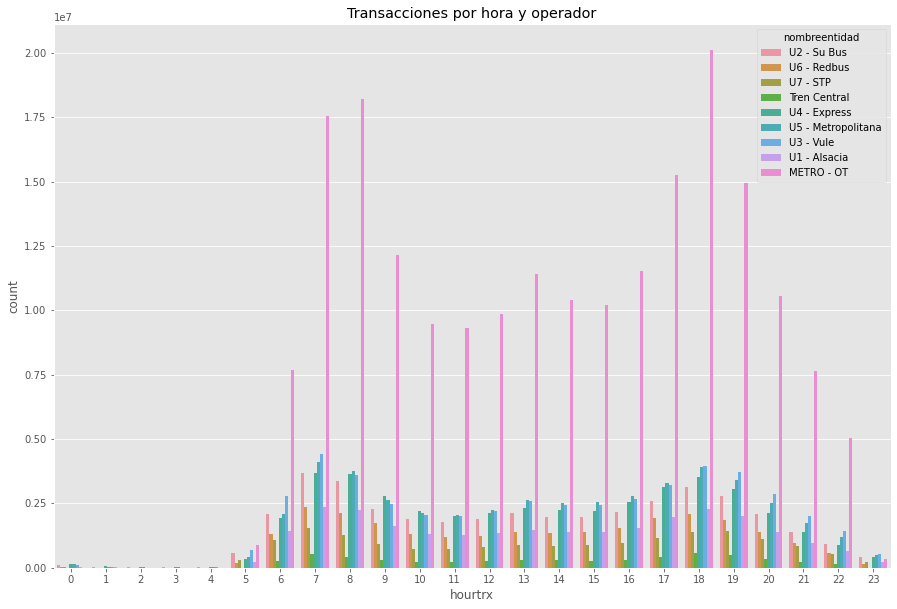

In [19]:
%%local

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.style.use('ggplot')
sns.barplot(x='hourtrx', y='count', hue='nombreentidad', data=dflocal)
plt.title('Transacciones por hora y operador')


+ Dado este grafico se puede apreciar que el operador con más transacciones por hora es METRO OT.
+ Tambien podemos notar que las transacciones son mayores alrededor de las 7 am y 6 pm. Esto nos indicaría que la gente usa más el transporte al inicio de la jornada laboral y al termino. Tambien se presenta un mayor aumento de transacciones cercano a la hora de almuerzo.